<a href="https://colab.research.google.com/github/eng-abdelrahman-sharaf/dimensionality-reduction/blob/main/dimentionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
def standardize(X):
    means = np.mean(X, axis=0) # D x 1
    stds = np.std(X, axis=0) # D x 1
    X_std = (X - means) / stds # N x D
    return X_std

In [111]:
class PCA:
  def __init__(self, n_components):
    self.n_components = n_components

  def fit(self,X):
    # Centering the data
    self.means = np.mean(X,axis=0)
    X_centered = X - self.means

    # Covariance matrix
    cov = np.cov(X,rowvar=False)

    # Eigen decomposition
    eigen_values, eigen_vectors = np.linalg.eig(cov)

    # Sort eigen values and vectors
    sorted_idx = np.argsort(eigen_values)[::-1] # -1 for step = -1 (reverse list)
    self.eigen_values = eigen_values[sorted_idx]
    self.eigen_vectors = eigen_vectors[:,sorted_idx]

    # Select top k components
    self.components = self.eigen_vectors[:,:self.n_components] # D x n_components

    self.variance_ratio = (self.eigen_values/np.sum(eigen_values))[:self.n_components]
    self.total_variance_ratio = np.sum(self.variance_ratio)

  def fit_transform(self,X):
    X_centered = X - self.means # N x D
    return np.dot(X_centered, self.components) # (N x n_component)

  def inverse_transform(self,X_reduced):
    # Mapping to original space
    # X_reduced : (N x n_component)
    return np.dot(X_reduced, self.components.T) + self.means # (N x D)

  def reconstruction_error(self,X):
    X_reduced = self.fit_transform(X)
    X_reconstructed = self.inverse_transform(X_reduced)
    return np.mean(np.square(np.square(X - X_reconstructed)))

In [112]:
data = pd.read_csv("breast_cancer.csv",index_col="id")
data.drop(columns=["Unnamed: 32"],inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [113]:
# Drop target column
X = data.drop(columns=["diagnosis"]).values

# Standardize
X_std = standardize(X)

# Apply PCA
pca = PCA(n_components=2)
pca.fit(X_std)

X_pca = pca.fit_transform(X_std)
recon_error = pca.reconstruction_error(X_std)

print("Variance Ratio:", pca.variance_ratio)
print("Total Variance Ratio:", pca.total_variance_ratio)
print("Reconstruction Error:", recon_error)

Variance Ratio: [0.44272026 0.18971182]
Total Variance Ratio: 0.6324320765155943
Reconstruction Error: 2.3641909709934015


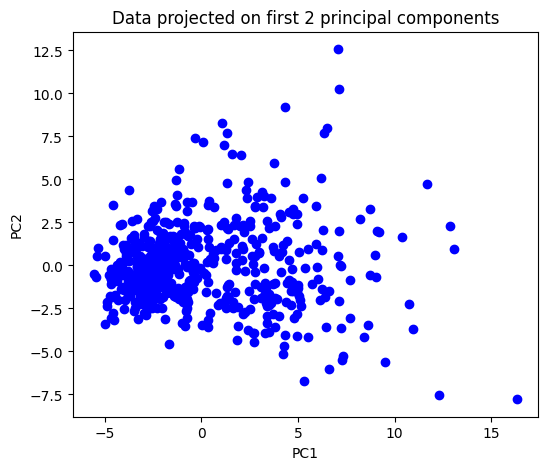

In [114]:
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c='blue')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Data projected on first 2 principal components")
plt.show()